Importamos las librerias necesarias.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

Creamos un array con los nombres de los documentos de la carpeta "Data", y limitamos para obtener los ultimos 7.

In [4]:
files = os.listdir("./Data/")[-7:]

In [5]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

Eliminamos el archivo con un nombre en específico del array.

In [6]:
files.remove("uber-raw-data-janjune-15.csv")

In [7]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

Importamos los archivos con los nombres del array y los juntamos todos en el mismo dataframe.

In [8]:
path = "./Data/"

final = pd.DataFrame()

for file in files:
    df = pd.read_csv(path + file, encoding="utf-8")
    final = pd.concat([df, final])

In [9]:
final.shape

(4534327, 4)

Copiamos el dataframe en otra variable para poder manipularlo.

In [10]:
df = final.copy()

In [11]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [12]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

Ponemos en formato de fecha la columna "Date/Time" del dataframe.

In [13]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"], format="%m/%d/%Y %H:%M:%S")

In [14]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [15]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


Creamos columnas auxiliares para verificar la columna de fechas.

In [16]:
df["weekday"] = df["Date/Time"].dt.day_name()

In [17]:
df["day"] = df["Date/Time"].dt.day

In [18]:
df["minute"] = df["Date/Time"].dt.minute
df["month"] = df["Date/Time"].dt.month
df["hours"] = df["Date/Time"].dt.hour

In [33]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hours
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0


In [20]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
weekday              object
day                   int64
minute                int64
month                 int64
hours                 int64
dtype: object

Graficamos la frecuencia de las fechas por día de la semana.

In [21]:
import plotly.express as px

In [22]:
df["weekday"].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: weekday, dtype: int64

In [23]:
fig = px.bar(df, x = df["weekday"].value_counts().index, y = df["weekday"].value_counts(), title = "Weekday", color = df["weekday"].value_counts().index, width=1000, height=600)
fig.show()

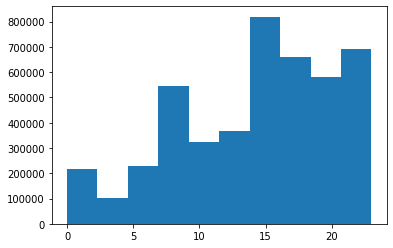

In [47]:
plt.hist(df["hours"])
plt.show()

In [25]:
df["month"].unique()

array([9, 5, 6, 7, 8, 4], dtype=int64)

In [26]:
for i, month in enumerate(df["month"].unique()):
    print(i) 
    print(month)

0
9
1
5
2
6
3
7
4
8
5
4


In [27]:
import calendar

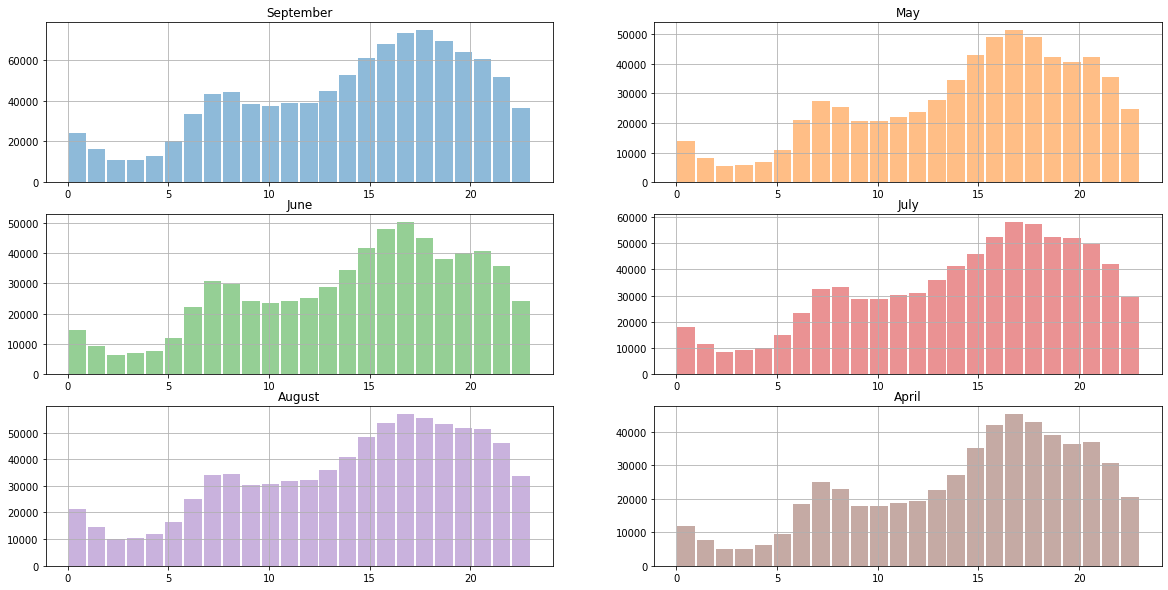

In [29]:
f = plt.figure(figsize=(20,10))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
for i, month in enumerate(df["month"].unique()):
    plt.subplot(3, 2, i+1, title=calendar.month_name[month])
    df[df["month"]== month]["hours"].hist(color=colors[i], alpha=0.5, rwidth=0.9, bins=24)

En las anteriores gráficas se puede observar las horas en la que mayor demanda de viajes existe.

Las horas con mayor demanda para los meses de Abril a Septiembre son las que se encuentran en alrededor de las 5:00pm.

In [46]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hours
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0


In [49]:
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [51]:
df.groupby("month")["hours"].count()

month
4     564516
5     652435
6     663844
7     796121
8     829275
9    1028136
Name: hours, dtype: int64

In [76]:
trace1 = go.Bar(
    x=df.groupby("month")["hours"].count().index, 
    y=df.groupby("month")["hours"].count(),
    name="Priority", 
    )

In [77]:
iplot([trace1])

c:\Users\Jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



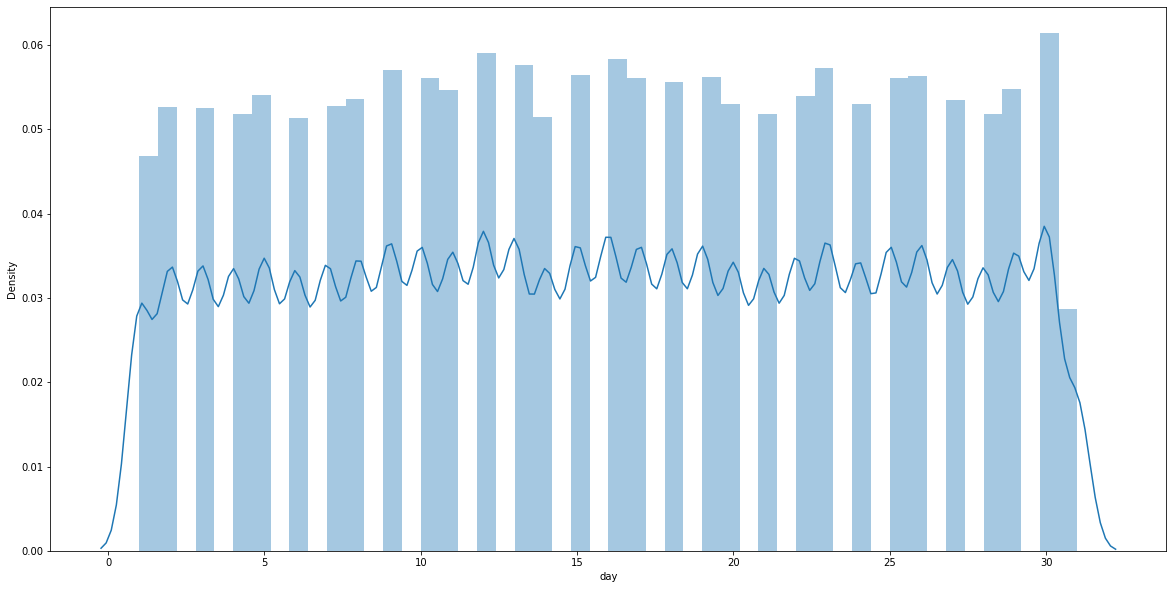

In [90]:
plt.figure(figsize=(20,10))
fig = sns.distplot(df["day"])
plt.show()

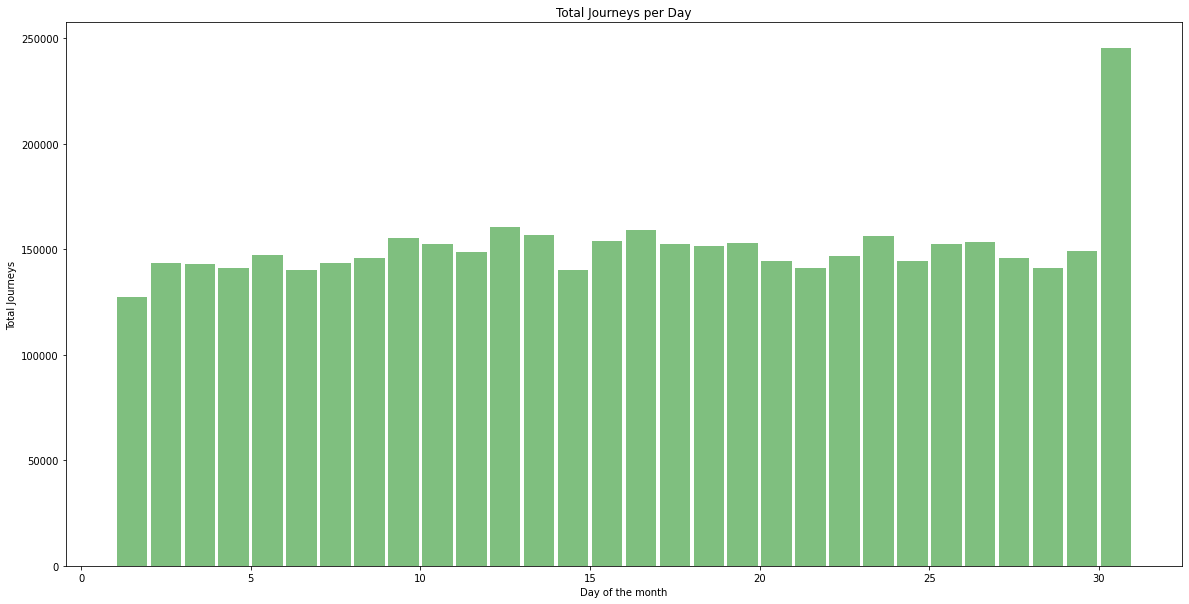

In [91]:
plt.figure(figsize=(20,10))
plt.hist(df["day"], bins=30, color="green", alpha=0.5, rwidth=0.9)
plt.xlabel("Day of the month")
plt.ylabel("Total Journeys")
plt.title("Total Journeys per Day")
plt.show()